## Assignment 2: Time Series Forecasting

### Dongju Ma A1942340

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('./data/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
data = df[['date', 'Appliances']].copy()
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


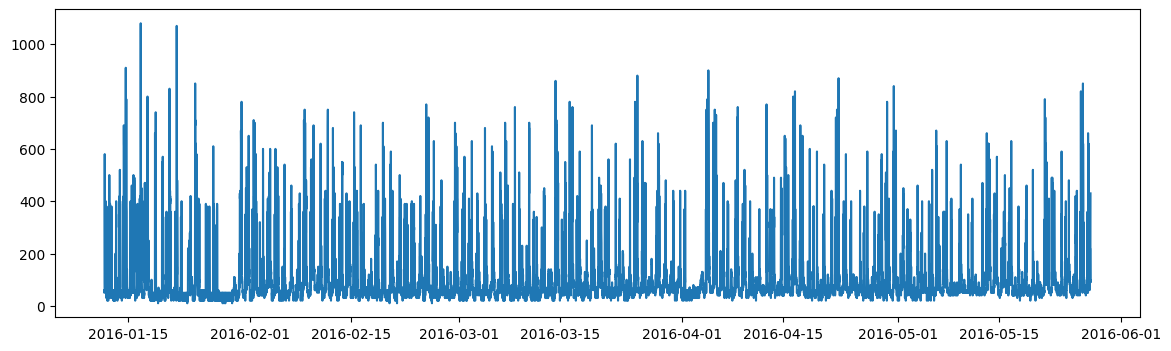

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data)

### 3. Implement prediction models

#### Auto Arima

In [8]:
from statsmodels.tsa.stattools import adfuller

data_hourly = data.resample('h').mean()
data_hourly

result = adfuller(data_hourly)
print(f'p-value: {result[1]}')

p-value: 8.833753129594142e-15


In [9]:
split1 = len(data_hourly['2016-05-01':])
train1 = data_hourly[:-split1]
test1 = data_hourly[-split1:]
print(f'Train1 shape: {train1.shape}')
print(f'Test1 shape: {test1.shape}')

Train1 shape: (2647, 1)
Test1 shape: (643, 1)


In [10]:
from pmdarima import auto_arima

model_arima = auto_arima(
    train1,
    seasonal=True,
    m=24,
    max_p=2, max_q=2, max_d=1,
    max_P=1, max_Q=1, max_D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=29744.881, Time=8.56 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=30974.462, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=29873.913, Time=2.46 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=30245.414, Time=2.35 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=33262.412, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=29756.774, Time=3.71 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=29745.435, Time=5.56 sec
 ARIMA(2,0,2)(0,0,0)[24] intercept   : AIC=29805.683, Time=0.74 sec
 ARIMA(1,0,2)(1,0,1)[24] intercept   : AIC=29628.438, Time=7.76 sec
 ARIMA(1,0,2)(0,0,1)[24] intercept   : AIC=29754.679, Time=2.89 sec
 ARIMA(1,0,2)(1,0,0)[24] intercept   : AIC=29743.439, Time=4.08 sec
 ARIMA(1,0,2)(0,0,0)[24] intercept   : AIC=29804.331, Time=0.49 sec
 ARIMA(0,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=6.99 sec
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=5.87 sec
 ARIMA(0,0,1)(1,0

In [20]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2647
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -14798.539
Date:                            Mon, 05 May 2025   AIC                          29611.078
Time:                                    14:28:55   BIC                          29652.246
Sample:                                01-11-2016   HQIC                         29625.980
                                     - 04-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2936      1.454      3.641      0.000       2.444       8.143
ar.L1          0.1918      0.051      3.779      0.000       0.092       0.291
ar.L2          0.3395      0.026     13.284      0.000       0.289       0.390
ma.L1          0.2078      0.053      3.943      0.000       0.105       0.311
ar.S.L24       0.8699      0.024     35.539      0.000       0.822       0.918
ma.S.L24      -0.7437      0.034    -21.840      0.000      -0.810      -0.677
sigma2      4272.8368     75.433     56.644      0.000    4124.990    4420.683
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):             11524.49
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             2.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### LSTM

In [11]:
import torch
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

series = data['Appliances'].values.reshape(-1,1)

scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len]
        y = data[i+seq_len][0]
        xs.append(x)
        ys.append(y)
    return (
        torch.tensor(np.array(xs), dtype=torch.float32),
        torch.tensor(np.array(ys), dtype=torch.float32).unsqueeze(1)
    )

seq_len = 6
X, y = create_sequences(series_scaled, seq_len)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :]) 
        return out
    
model_lstm = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

In [27]:
from torchinfo import summary

summary(model_lstm, input_size=(len(X_train), 6, 1))

Layer (type:depth-idx)                   Output Shape              Param #
LSTMModel                                [15783, 1]                --
├─LSTM: 1-1                              [15783, 6, 64]            17,152
├─Linear: 1-2                            [15783, 1]                65
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
Total mult-adds (G): 1.63
Input size (MB): 0.38
Forward/backward pass size (MB): 48.61
Params size (MB): 0.07
Estimated Total Size (MB): 49.06

### 4. Train prediction models

#### Auto Arima

In [12]:
model_arima.fit(train1)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(1, 0, 1, 24),
      suppress_warnings=True)

#### LSTM

In [13]:
for epoch in range(300):
    model_lstm.train()
    output = model_lstm(X_train)  
    loss = criterion(output, y_train)  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.0178
Epoch 2, Loss: 0.0154
Epoch 3, Loss: 0.0135
Epoch 4, Loss: 0.0120
Epoch 5, Loss: 0.0109
Epoch 6, Loss: 0.0102
Epoch 7, Loss: 0.0097
Epoch 8, Loss: 0.0095
Epoch 9, Loss: 0.0096
Epoch 10, Loss: 0.0097
Epoch 11, Loss: 0.0099
Epoch 12, Loss: 0.0101
Epoch 13, Loss: 0.0102
Epoch 14, Loss: 0.0102
Epoch 15, Loss: 0.0102
Epoch 16, Loss: 0.0100
Epoch 17, Loss: 0.0099
Epoch 18, Loss: 0.0097
Epoch 19, Loss: 0.0095
Epoch 20, Loss: 0.0094
Epoch 21, Loss: 0.0093
Epoch 22, Loss: 0.0092
Epoch 23, Loss: 0.0091
Epoch 24, Loss: 0.0091
Epoch 25, Loss: 0.0091
Epoch 26, Loss: 0.0091
Epoch 27, Loss: 0.0091
Epoch 28, Loss: 0.0091
Epoch 29, Loss: 0.0091
Epoch 30, Loss: 0.0090
Epoch 31, Loss: 0.0090
Epoch 32, Loss: 0.0090
Epoch 33, Loss: 0.0089
Epoch 34, Loss: 0.0089
Epoch 35, Loss: 0.0088
Epoch 36, Loss: 0.0087
Epoch 37, Loss: 0.0087
Epoch 38, Loss: 0.0086
Epoch 39, Loss: 0.0086
Epoch 40, Loss: 0.0086
Epoch 41, Loss: 0.0085
Epoch 42, Loss: 0.0085
Epoch 43, Loss: 0.0085
Epoch 44, Loss: 0.00

### 5. Test predictin models and show results

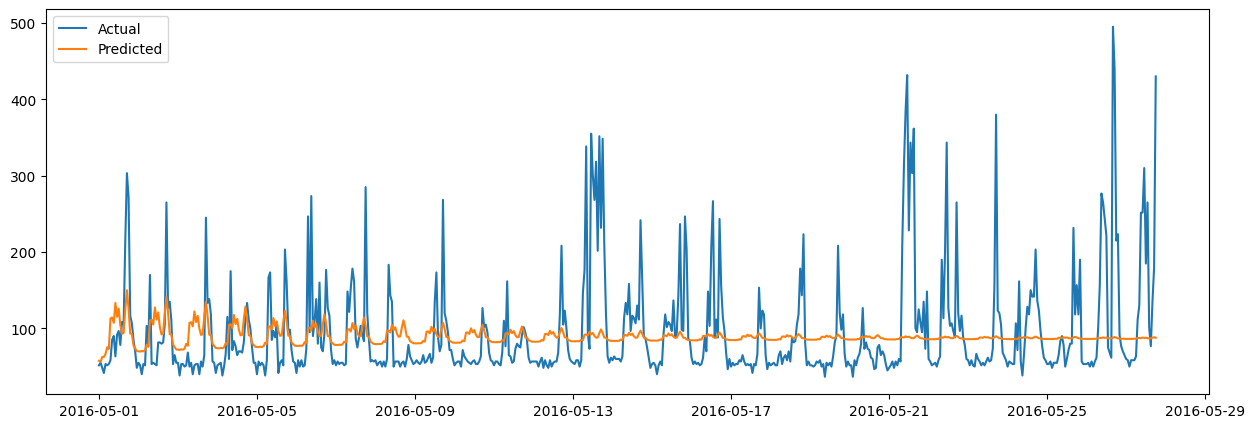

In [14]:
forecast_arima = model_arima.predict(n_periods=split1)  
forecast_arima = pd.Series(forecast_arima, index=test1.index)

plt.figure(figsize=(15, 5))
plt.plot(test1, label='Actual')
plt.plot(forecast_arima, label='Predicted')
plt.legend()
plt.show()

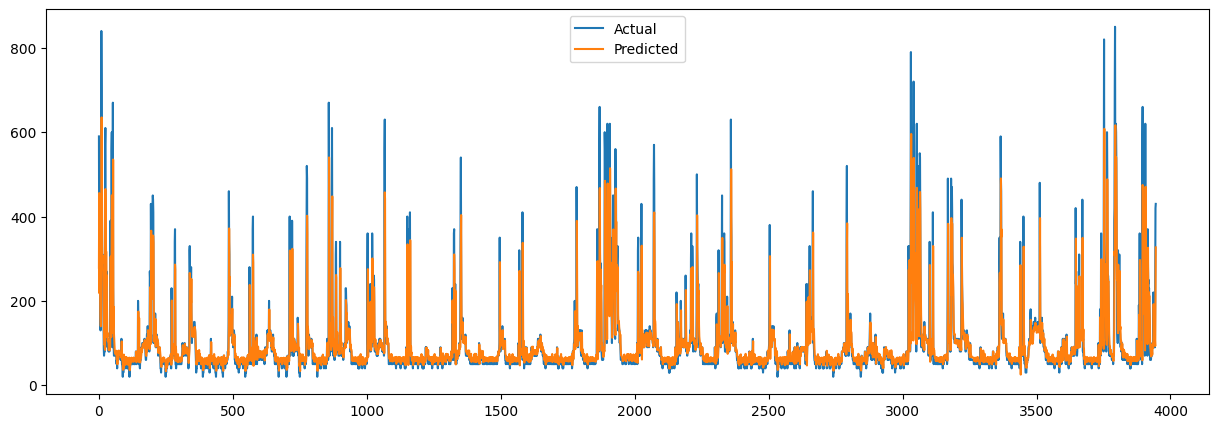

In [15]:
model_lstm.eval()
with torch.no_grad():
    pred = model_lstm(X_test).squeeze().numpy()

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
pred_inv = scaler.inverse_transform(pred.reshape(-1, 1)).flatten()

plt.figure(figsize=(15, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(pred_inv, label='Predicted')
plt.legend()
plt.show()

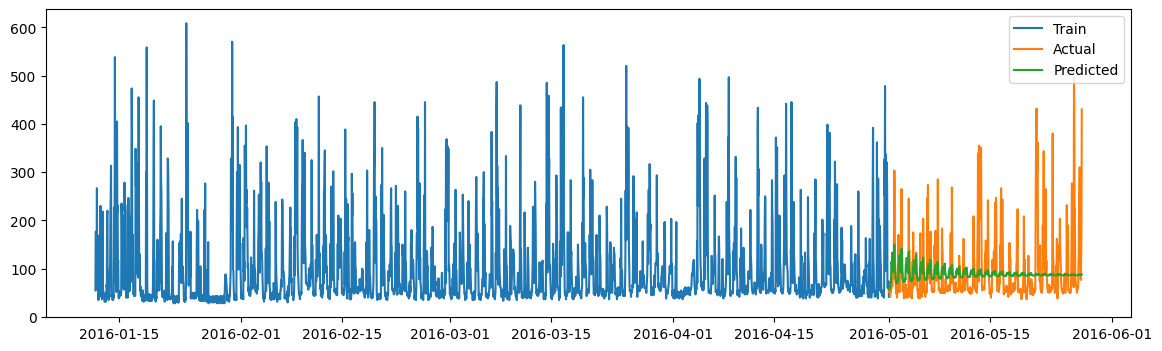

In [16]:
plt.figure(figsize=(14, 4))
plt.plot(train1, label='Train')
plt.plot(test1, label='Actual')
plt.plot(forecast_arima, label='Predicted')
plt.legend()
plt.show()

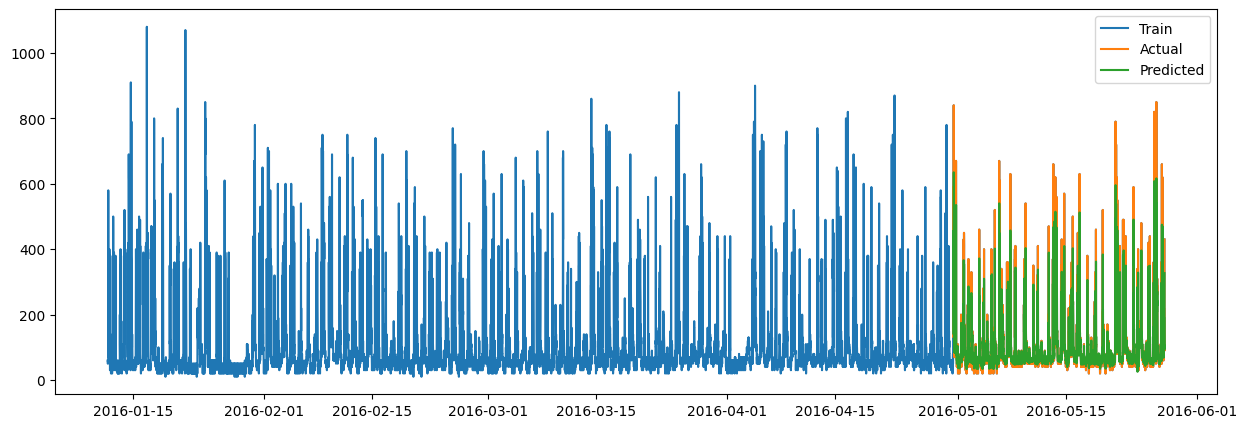

In [17]:
# 滑动窗口偏移后的索引
full_index = data.index[seq_len:]  
train_len = len(y_train)

# 测试集对应索引
test_index = full_index[train_len:]  

# 画图
plt.figure(figsize=(15, 5))
plt.plot(data, label='Train')  # 训练集真实值
plt.plot(test_index, y_test_inv, label='Actual')           
plt.plot(test_index, pred_inv, label='Predicted')           
plt.legend()
plt.show()

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

In [21]:
mse_arima = mean_squared_error(test1.values, forecast_arima.values)
rmse_arima = mse_arima ** 0.5

print(f"MSE (LSTM): {mse_arima:.4f}")
print(f"RMSE (LSTM): {rmse_arima:.4f}")

MSE (LSTM): 4418.3514
RMSE (LSTM): 66.4707


In [22]:
mse_lstm = mean_squared_error(y_test_inv, pred_inv)
rmse_lstm = mse_lstm ** 0.5

print(f"MSE (LSTM): {mse_lstm:.4f}")
print(f"RMSE (LSTM): {rmse_lstm:.4f}")

MSE (LSTM): 3644.4810
RMSE (LSTM): 60.3695


### 7. Reflect on what you have learned by completing this assignment

### 8. References